# Recommendation 4: How to Separate Stimulus-locked Changes in Aperiodic Activity from ERPs


### Issue

Estimating time-resolved aperiodic activity during experimental tasks presents a similar challenge as any other event-locked analysis: when a stimulus is presented, there are potentially a lot of electrophysiological changes happening all at once! Event-related potentials (ERPs) are one fundamentally stimulus-locked phenomonen which might interact with stimulus-induced changes in oscillatory and aperiodic activities. How might we go about separating them?

### Solution

This is an ongoing and empirically open question. A few publications directly address this question (linked here), and here we summarize their approaches as well as a few others that we in the Voytek lab have been trying.

### Related Work

The following papers include discussion of this topic:

- [LINK](LINK), AUTHORS, YEAR

### Related Discussion / Examples

The following examples discuss related topics:
-  [LINK](LINK), DESCRIPTION

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import fooof

from neurodsp.sim import sim_combined, sim_knee, sim_peak_oscillation, sim_frac_gaussian_noise
from neurodsp.sim.transients import sim_damped_erp
from neurodsp.sim.utils import rotate_timeseries, rotate_spectrum
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.time_series import plot_time_series
from neurodsp.utils import create_times, set_random_seed

In [3]:
# Add path and import custom code for the project
import sys
sys.path.append('code')

### Settings

In [56]:
import seaborn as sns
sns.set_context('poster')

In [57]:
# Set random seed
set_random_seed(808)

In [58]:
# Set whether to save out figures
SAVE_FIG = False

### Demonstrating the problem: How can an ERP interact with changes in the Aperiodic Exponent?


#### Generate two timeseries: one from a pre-stimulus interval, and another from post-stimulus interval with a rotated power spectrum. Separately, generate an ERP

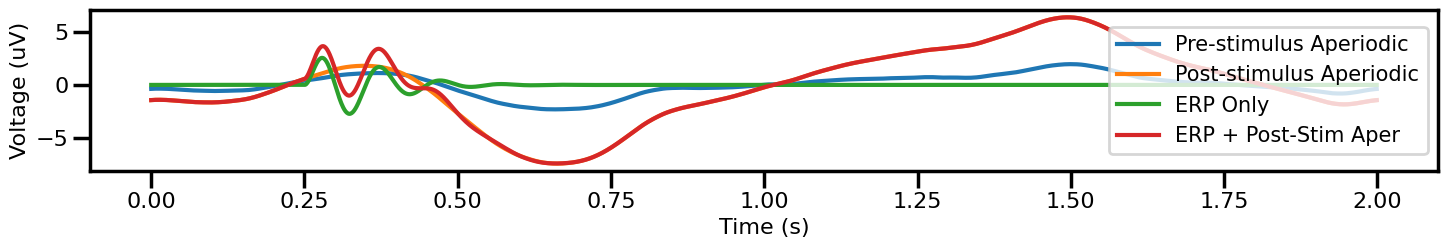

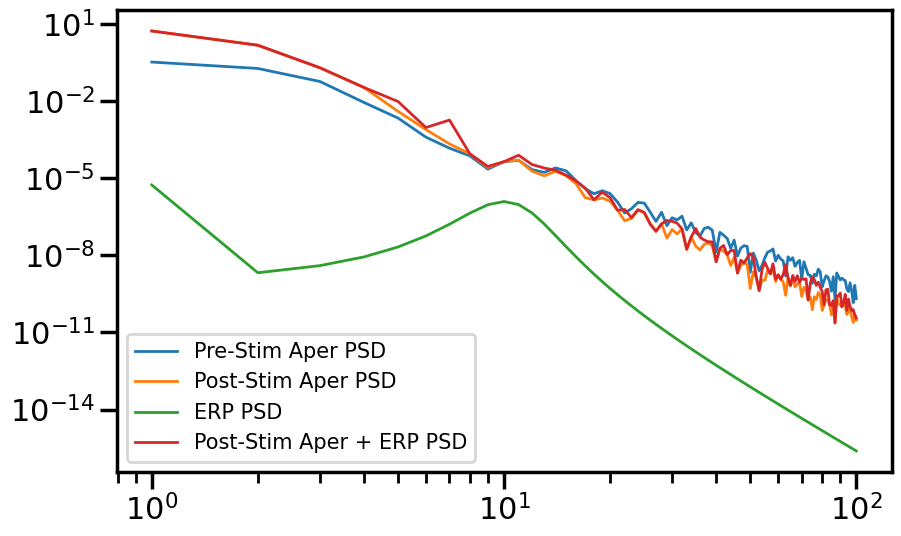

In [61]:
## Simulate timeseries as a combination of aperiodic and periodic components
sim_components = {'sim_knee': {'exponent1' : 0, 'exponent2':-5, 'knee':10},
                  }
fs = 1000
n_seconds = 2
ap_sig_pre = sim_knee(n_seconds, fs,**sim_components['sim_knee'])
ap_sig_post = rotate_timeseries(ap_sig_pre, fs, delta_exp=1, f_rotation=10)
erp_sig = sim_damped_erp(n_seconds, fs, amp=3, freq=10, decay=0.05, time_start=0.25)
erp_plus_aper = ap_sig_post + erp_sig

# plot timeseries
times = create_times(n_seconds=n_seconds, fs=fs)
plot_time_series(times, [ap_sig_pre, ap_sig_post, erp_sig, erp_plus_aper], labels=['Pre-stimulus Aperiodic', 'Post-stimulus Aperiodic', 'ERP Only', 'ERP + Post-Stim Aper'])
plt.legend(loc = 'right', fontsize=15)
plt.show()

## Compute the power spectrum using Welch's 
freqs_pre, powers_pre = compute_spectrum(ap_sig_pre, fs=fs, f_range=(0.1,100), avg_type='median', nperseg=fs, noverlap=fs/2)
freqs_post, powers_post = compute_spectrum(ap_sig_post, fs=fs, f_range=(0.1,100), avg_type='median', nperseg=fs, noverlap=fs/2)
freqs_erp, powers_erp = compute_spectrum(erp_sig, fs=fs, f_range=(0.1,100), avg_type='median', nperseg=fs, noverlap=fs/2)
freqs_erp_plus, powers_erp_plus = compute_spectrum(erp_plus_aper, fs=fs, f_range=(0.1,100), avg_type='median', nperseg=fs, noverlap=fs/2)

fig,ax = plt.subplots(figsize=(10,6))
plt.loglog(freqs_pre,powers_pre, linewidth=2, label='Pre-Stim Aper PSD')
plt.loglog(freqs_post,powers_post, linewidth=2, label='Post-Stim Aper PSD')
plt.loglog(freqs_erp,powers_erp, linewidth=2, label= 'ERP PSD')
plt.loglog(freqs_erp_plus,powers_erp_plus, linewidth=2, label='Post-Stim Aper + ERP PSD')
plt.legend(loc='lower left',fontsize=15)
plt.show()

### SECTION II TITLE

### Conclusion

<>